In [50]:
import glob
import sys
import os
import copy
import math
import numpy as np 
import pandas as pd
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from sklearn import svm
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from numpy import set_printoptions

In [2]:
INPUT = os.getcwd()
INPUT = os.path.join(INPUT, "ROIscol7")
INPUT

'/home/superuser/Dados/col7_0/ROIs_csv/ROIscol7'

In [3]:
year = 2000
bacia = '744'

In [4]:
allfiles = glob.glob(os.path.join(INPUT, "*.csv"))
df_from_each_file = []

zz = 0
for cc, file in enumerate(allfiles):      
    
#     ls_parte = file.split('/')
#     name_bacia = ls_parte[-1].replace('_2.csv', '')     
    print('lindo de {} ==> {}'.format(cc ,file))
    
    newdf = pd.read_csv(file)     
    newdf = newdf.drop(['system:index','.geo'], axis=1)
    df_from_each_file.append(newdf[newdf['year'] == year])
    zz += 1
    
print("leiu {} de {} no folder".format(zz, len(allfiles)))

lindo de 0 ==> /home/superuser/Dados/col7_0/ROIs_csv/ROIscol7/744_2.csv
lindo de 1 ==> /home/superuser/Dados/col7_0/ROIs_csv/ROIscol7/757_2.csv
lindo de 2 ==> /home/superuser/Dados/col7_0/ROIs_csv/ROIscol7/772_2.csv
lindo de 3 ==> /home/superuser/Dados/col7_0/ROIs_csv/ROIscol7/755_2.csv
lindo de 4 ==> /home/superuser/Dados/col7_0/ROIs_csv/ROIscol7/754_2.csv
lindo de 5 ==> /home/superuser/Dados/col7_0/ROIs_csv/ROIscol7/7492_2.csv
lindo de 6 ==> /home/superuser/Dados/col7_0/ROIs_csv/ROIscol7/759_2.csv
lindo de 7 ==> /home/superuser/Dados/col7_0/ROIs_csv/ROIscol7/7622_2.csv
lindo de 8 ==> /home/superuser/Dados/col7_0/ROIs_csv/ROIscol7/741_2.csv
lindo de 9 ==> /home/superuser/Dados/col7_0/ROIs_csv/ROIscol7/746_2.csv
lindo de 10 ==> /home/superuser/Dados/col7_0/ROIs_csv/ROIscol7/758_2.csv
lindo de 11 ==> /home/superuser/Dados/col7_0/ROIs_csv/ROIscol7/771_2.csv
lindo de 12 ==> /home/superuser/Dados/col7_0/ROIs_csv/ROIscol7/751_2.csv
lindo de 13 ==> /home/superuser/Dados/col7_0/ROIs_csv/ROIsc

In [5]:
concat_df  = pd.concat(df_from_each_file, axis=0, ignore_index=True)
print("temos {} filas ".format(concat_df.shape))
concat_df.head()

temos (130265, 123) filas 


,blue_median,blue_median_dry,blue_median_wet,blue_min,blue_stdDev,cai_median,cai_median_dry,cai_stdDev,class,cloud_amp,...,swir2_median,swir2_median_dry,swir2_median_wet,swir2_min,swir2_stdDev,wefi_amp,wefi_median,wefi_median_wet,wefi_stdDev,year
0,448.0,474.0,485.0,335.0,135.0,16015.0,15976.0,1048.0,33,13.0,...,866.0,722.0,860.0,394.0,323.0,38.0,33.0,42.0,12.0,2000
1,237.0,391.0,185.0,152.0,106.0,14353.0,14833.0,412.0,3,4.0,...,595.0,752.0,495.0,472.0,136.0,18.0,62.0,63.0,5.0,2000
2,259.0,392.0,206.0,172.0,106.0,14171.0,14808.0,433.0,3,4.0,...,564.0,779.0,468.0,434.0,163.0,24.0,67.0,68.0,7.0,2000
3,230.0,354.0,176.0,153.0,109.0,14128.0,14561.0,522.0,3,4.0,...,520.0,731.0,423.0,379.0,146.0,22.0,64.0,66.0,7.0,2000
4,272.0,421.0,214.0,190.0,100.0,14623.0,15094.0,490.0,3,4.0,...,647.0,889.0,515.0,479.0,168.0,22.0,64.0,69.0,6.0,2000


In [7]:
print("Numero de amostras ", concat_df.shape)
print("visualizar as 5 primeiras filas \n", concat_df.head(5))

Numero de amostras  (130265, 123)
visualizar as 5 primeiras filas 
    blue_median  blue_median_dry  blue_median_wet  blue_min  blue_stdDev  \
0        448.0            474.0            485.0     335.0        135.0   
1        237.0            391.0            185.0     152.0        106.0   
2        259.0            392.0            206.0     172.0        106.0   
3        230.0            354.0            176.0     153.0        109.0   
4        272.0            421.0            214.0     190.0        100.0   

   cai_median  cai_median_dry  cai_stdDev  class  cloud_amp  ...  \
0     16015.0         15976.0      1048.0     33       13.0  ...   
1     14353.0         14833.0       412.0      3        4.0  ...   
2     14171.0         14808.0       433.0      3        4.0  ...   
3     14128.0         14561.0       522.0      3        4.0  ...   
4     14623.0         15094.0       490.0      3        4.0  ...   

   swir2_median  swir2_median_dry  swir2_median_wet  swir2_min  swir2_st

In [8]:
columns_features = [
           "blue_median","blue_median_dry","blue_median_wet","blue_min",
            "cai_median","cai_median_dry","cai_stdDev",
            "cloud_max","cloud_median","cloud_median_dry","cloud_median_wet",
            "cloud_stdDev","evi2_amp","evi2_median","evi2_median_dry",
            "evi2_stdDev","gcvi_median","gcvi_median_dry","gcvi_median_wet",
            "green_median","green_median_dry","green_median_texture","green_median_wet",
            "green_stdDev","gv_amp","gv_max","gv_median",
            "gv_median_wet","gv_min","gv_stdDev","gvs_amp",
            "gvs_median","gvs_median_dry","gvs_median_wet","gvs_min",
            "hallcover_median","hallcover_stdDev", "ndfi_amp",
            "ndfi_median","ndfi_median_dry","ndfi_median_wet","ndfi_min",
            "ndvi_amp","ndvi_median","ndvi_median_dry","ndvi_median_wet",
            "ndwi_amp","ndwi_median","ndwi_median_dry","ndwi_median_wet",
            "nir_median","nir_median_dry","nir_median_wet","nir_min",
            "npv_amp","npv_max","npv_median","npv_median_dry",
            "npv_min","npv_stdDev","pri_median","pri_median_dry",
            "red_median","red_median_dry","red_median_wet","red_min",
            "savi_median","savi_median_dry","savi_median_wet","savi_stdDev",
            "sefi_median_dry","sefi_stdDev","shade_amp","shade_max",
            "shade_median_dry","shade_median_wet","shade_min","shade_stdDev",
            "slope_1","soil_amp","soil_max","soil_median",
            "soil_median_wet","soil_min","soil_stdDev","swir1_median",
            "swir1_median_wet","swir1_min","swir1_stdDev","swir2_median",
            "swir2_median_wet","swir2_min","swir2_stdDev","wefi_amp",          
        ]
classe = "class"


In [9]:
len(columns_features)

94

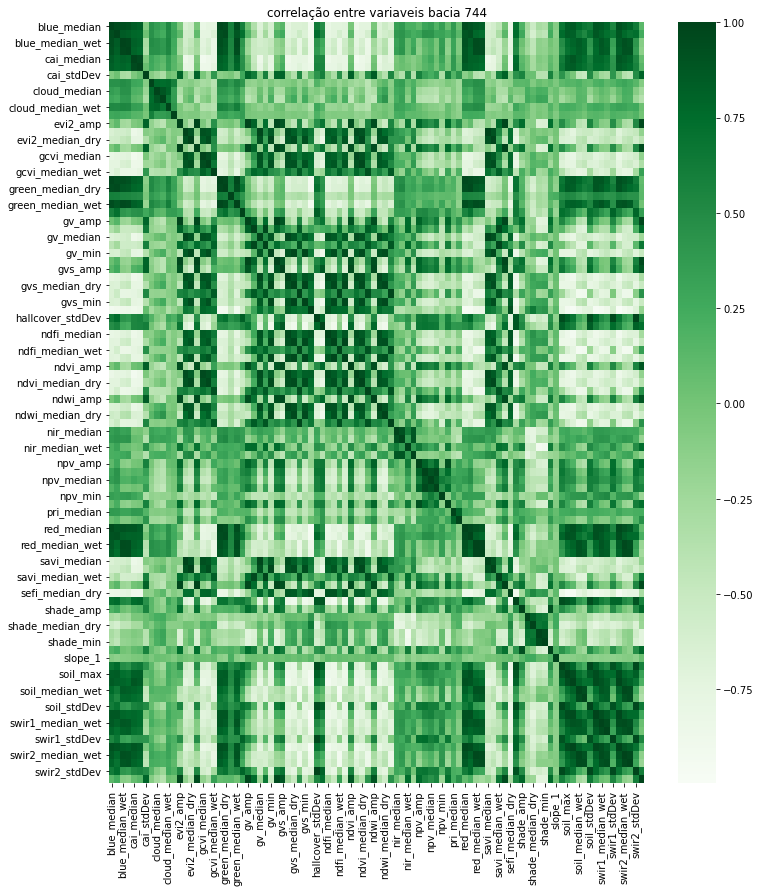

In [75]:
plt.figure(figsize=(12, 14))
# sns.color_palette("flare", as_cmap=True)
sns.heatmap(concat_df[columns_features].corr(),
           annot= False, fmt= '.2f', cmap= 'Greens')  #
plt.title("correlação entre variaveis bacia " + bacia)
plt.show()

In [11]:
varCorr = concat_df[columns_features].corr()

In [12]:
varCorr

,blue_median,blue_median_dry,blue_median_wet,blue_min,cai_median,cai_median_dry,cai_stdDev,cloud_max,cloud_median,cloud_median_dry,...,soil_stdDev,swir1_median,swir1_median_wet,swir1_min,swir1_stdDev,swir2_median,swir2_median_wet,swir2_min,swir2_stdDev,wefi_amp
blue_median,1.000000,0.952121,0.937087,0.917434,0.857471,0.826285,-0.084181,0.452282,0.359354,0.284396,...,0.622449,0.882483,0.874606,0.792013,0.540529,0.921958,0.864914,0.804231,0.626846,0.121314
blue_median_dry,0.952121,1.000000,0.854447,0.832407,0.782911,0.772665,0.031538,0.450967,0.313198,0.242726,...,0.710222,0.877075,0.814801,0.724744,0.669649,0.885238,0.768962,0.698308,0.737555,0.237896
blue_median_wet,0.937087,0.854447,1.000000,0.977862,0.827286,0.789530,-0.287601,0.489367,0.450036,0.389625,...,0.417829,0.785019,0.880720,0.813009,0.333484,0.853252,0.923271,0.884734,0.413336,-0.100759
blue_min,0.917434,0.832407,0.977862,1.000000,0.800922,0.763883,-0.326657,0.457283,0.453424,0.396446,...,0.375468,0.761698,0.868732,0.833342,0.285664,0.827944,0.911673,0.898775,0.367641,-0.137727
cai_median,0.857471,0.782911,0.827286,0.800922,1.000000,0.960667,-0.049401,0.283456,0.196362,0.131768,...,0.566570,0.778209,0.782854,0.714370,0.415850,0.887842,0.844030,0.799835,0.536161,0.076377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
swir2_median,0.921958,0.885238,0.853252,0.827944,0.887842,0.850294,-0.052938,0.246005,0.093825,0.028781,...,0.718457,0.970065,0.929815,0.856224,0.601471,1.000000,0.896516,0.834191,0.696906,0.186552
swir2_median_wet,0.864914,0.768962,0.923271,0.911673,0.844030,0.805089,-0.367964,0.297188,0.226605,0.199439,...,0.407150,0.828186,0.950851,0.898745,0.294306,0.896516,1.000000,0.965508,0.382463,-0.141995
swir2_min,0.804231,0.698308,0.884734,0.898775,0.799835,0.765952,-0.429113,0.231288,0.206720,0.185893,...,0.311019,0.763298,0.913499,0.930081,0.179561,0.834191,0.965508,1.000000,0.275263,-0.204128
swir2_stdDev,0.626846,0.737555,0.413336,0.367641,0.536161,0.572791,0.485922,0.137727,-0.098007,-0.223569,...,0.970218,0.759712,0.517816,0.404229,0.959657,0.696906,0.382463,0.275263,1.000000,0.605791


In [13]:
type(varCorr)

pandas.core.frame.DataFrame

In [29]:
 cor_matrix = concat_df[columns_features].corr().abs()
#  print(cor_matrix)

In [30]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                  blue_median  blue_median_dry  blue_median_wet  blue_min  \
blue_median               NaN         0.952121         0.937087  0.917434   
blue_median_dry           NaN              NaN         0.854447  0.832407   
blue_median_wet           NaN              NaN              NaN  0.977862   
blue_min                  NaN              NaN              NaN       NaN   
cai_median                NaN              NaN              NaN       NaN   
...                       ...              ...              ...       ...   
swir2_median              NaN              NaN              NaN       NaN   
swir2_median_wet          NaN              NaN              NaN       NaN   
swir2_min                 NaN              NaN              NaN       NaN   
swir2_stdDev              NaN              NaN              NaN       NaN   
wefi_amp                  NaN              NaN              NaN       NaN   

                  cai_median  cai_median_dry  cai_stdDev  cloud_max  \
blue

/tmp/ipykernel_80079/3477284062.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


### Step 5 - Droping the column with high correlation

So we are selecting the columns which are having absolute correlation greater than 0.95 and making a list of those columns named 'to_drop'. 

In [35]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(); print(to_drop)


['blue_median_dry', 'blue_median_wet', 'blue_min', 'cai_median_dry', 'evi2_median_dry', 'evi2_stdDev', 'gcvi_median', 'gcvi_median_dry', 'green_median', 'green_median_dry', 'green_median_wet', 'gv_amp', 'gv_median', 'gv_median_wet', 'gv_min', 'gv_stdDev', 'gvs_median', 'gvs_median_dry', 'gvs_min', 'hallcover_median', 'ndfi_amp', 'ndfi_median', 'ndfi_median_dry', 'ndfi_median_wet', 'ndfi_min', 'ndvi_amp', 'ndvi_median', 'ndvi_median_dry', 'ndvi_median_wet', 'ndwi_amp', 'ndwi_median', 'ndwi_median_dry', 'ndwi_median_wet', 'nir_median_dry', 'npv_median', 'npv_median_dry', 'npv_stdDev', 'red_median', 'red_median_dry', 'red_median_wet', 'red_min', 'savi_median', 'savi_median_dry', 'savi_median_wet', 'savi_stdDev', 'sefi_median_dry', 'sefi_stdDev', 'shade_median_wet', 'shade_min', 'shade_stdDev', 'soil_amp', 'soil_max', 'soil_median', 'soil_median_wet', 'soil_min', 'soil_stdDev', 'swir1_median', 'swir1_median_wet', 'swir1_min', 'swir1_stdDev', 'swir2_median', 'swir2_median_wet', 'swir2_min'

In [37]:
print(upper_tri['swir2_median']['blue_median_wet'])
print(upper_tri['swir2_median'])

0.8532518878368219
blue_median         0.921958
blue_median_dry     0.885238
blue_median_wet     0.853252
blue_min            0.827944
cai_median          0.887842
                      ...   
swir2_median             NaN
swir2_median_wet         NaN
swir2_min                NaN
swir2_stdDev             NaN
wefi_amp                 NaN
Name: swir2_median, Length: 94, dtype: float64


In [41]:
# Now we are droping the columns which are in the list 'to_drop' from the dataframe

df1 = concat_df.drop(to_drop, axis=1)
print(); print(df1.head())


   blue_median  blue_stdDev  cai_median  cai_stdDev  class  cloud_amp  \
0        448.0        135.0     16015.0      1048.0     33       13.0   
1        237.0        106.0     14353.0       412.0      3        4.0   
2        259.0        106.0     14171.0       433.0      3        4.0   
3        230.0        109.0     14128.0       522.0      3        4.0   
4        272.0        100.0     14623.0       490.0      3        4.0   

   cloud_max  cloud_median  cloud_median_dry  cloud_median_wet  ...  \
0       18.0           9.0              11.0               8.0  ...   
1        5.0           2.0               4.0               1.0  ...   
2        6.0           3.0               4.0               2.0  ...   
3        5.0           2.0               3.0               1.0  ...   
4        5.0           2.0               4.0               2.0  ...   

   shade_median_dry   slope    slope_1  soil_median_dry  swir1_median_dry  \
0              89.0   464.0   4.647021              0.0 

In [42]:
X = concat_df[columns_features]
y = concat_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)# Treinando modelo
model  = RandomForestClassifier(
                            n_estimators=85, 
                            max_features=25)
model.fit(X_train, y_train)# Mostrando importância de cada feature
# model.feature_importances_

array([0.00756178991912513  , 0.006381940850386373 ,
       0.024271991279236765 , 0.03739448147599082  ,
       0.009461399726251395 , 0.015500400749705863 ,
       0.005271560903154462 , 0.0033566355706222406,
       0.0017664112015075971, 0.0018505090292857693,
       0.0020441896397825634, 0.0009125537691866863,
       0.006455188679162503 , 0.0255621495075806   ,
       0.00486069563080424  , 0.014025296677206665 ,
       0.010962921631452831 , 0.008048098368681674 ,
       0.01356370359859068  , 0.030140544408271817 ,
       0.018859892803102473 , 0.016493752282227804 ,
       0.009687459500538852 , 0.006769329344023761 ,
       0.006173608354787815 , 0.0052400690557198445,
       0.04089551195238214  , 0.004505884216200622 ,
       0.0026453600454998615, 0.008096046748855732 ,
       0.005138465397945938 , 0.011627632000336622 ,
       0.00332223958266871  , 0.008527152716352598 ,
       0.003814604788820129 , 0.028148385275249852 ,
       0.0074687262354976355, 0.00596866180474

In [48]:
y_pred = model.predict(X_test[columns_features])

In [51]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[ 2961,    61,     0,     0,     0,     1,     0],
       [   43, 22832,    31,    11,    28,     0,     0],
       [    0,    41,  2160,     0,    14,     2,     0],
       [    2,    27,     2,  1093,    57,     4,     0],
       [    1,    85,     9,    24,  2511,     3,     0],
       [    0,     1,     0,     6,    11,   484,     0],
       [    0,     1,     0,     0,     0,     0,    61]])

/home/superuser/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


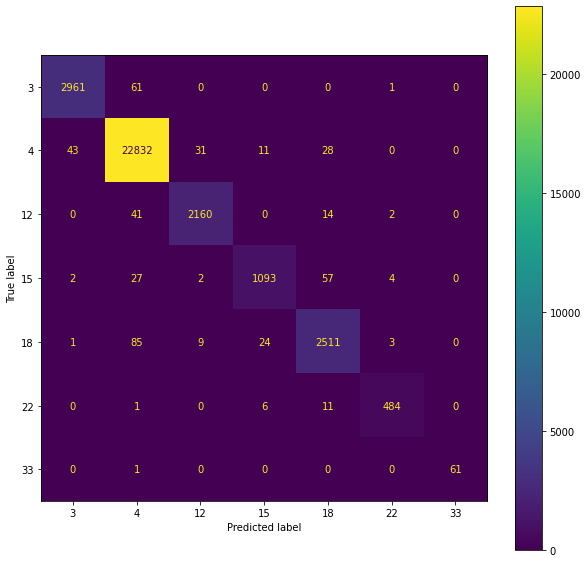

In [60]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, X_test[columns_features], y_test, ax=ax) 
plt.show()  

In [61]:
varlorAcc = accuracy_score(y_test, y_pred)
print("Acurcia geral ====>  {}".format(varlorAcc))

Acurcia geral ====>  0.985721742868548


In [43]:
lstImport = model.feature_importances_
print(len(lstImport))

94


Text(0.5, 1.0, 'Importância de cada feature')

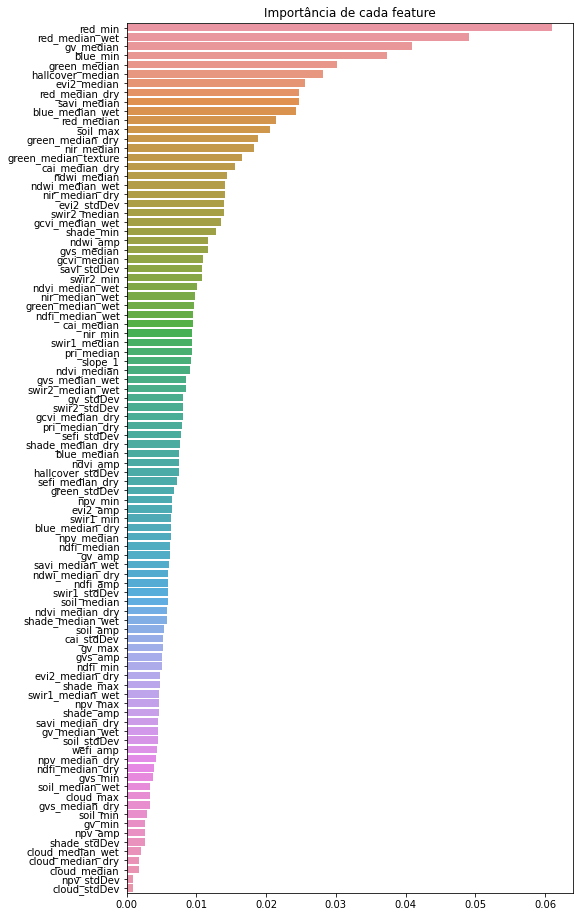

In [44]:
importances = pd.Series(data=model.feature_importances_, index=columns_features)
importances = importances[importances[columns_features] > 0].sort_values(ascending = False)
plt.figure(figsize=(8,16))
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [27]:
type(importances)

pandas.core.series.Series

In [38]:
importances

red_min             0.036768
hallcover_median    0.033252
blue_median_wet     0.027909
swir2_median_wet    0.027089
green_median        0.026216
                      ...   
cloud_median_wet    0.002418
cloud_median_dry    0.002045
cloud_median        0.001932
npv_stdDev          0.001148
cloud_stdDev        0.000996
Length: 94, dtype: float64

In [62]:
print(upper_tri['swir2_median']['blue_median_wet'])

0.8532518878368219


In [65]:
# ??

In [70]:
ls_name_imp = []
for cc, (name, _imp) in enumerate(importances.iteritems()):
#     print(cc, name, _imp)
    if cc == 0:
        print(cc, name, _imp)
        ls_name_imp.append(name)
    else:
        anexar = True
        for nname in ls_name_imp:
            val_corr = upper_tri[name][nname]
            if val_corr > 0.9:
                anexar = False
                
        if anexar:
            print(cc, name, _imp)
            ls_name_imp.append(name)
                
            
    
    



In [72]:
len(ls_name_imp)

49

In [73]:
index_d = 5
for index in range(0, len(ls_name_imp), 5):
    text = ''
    for jj in ls_name_imp[index : index_d]:
        text += '"' + jj + '",'
    print(text)
    index_d += 5 

"red_min","red_median_wet","gv_median","blue_min","hallcover_median",
"evi2_median","blue_median_wet","green_median_dry","nir_median","green_median_texture",
"cai_median_dry","ndwi_median_wet","evi2_stdDev","gcvi_median_wet","shade_min",
"nir_median_wet","ndfi_median_wet","cai_median","nir_min","pri_median",
"slope_1","gvs_median_wet","swir2_stdDev","gcvi_median_dry","pri_median_dry",
"sefi_stdDev","shade_median_dry","blue_median","hallcover_stdDev","green_stdDev",
"npv_min","evi2_amp","swir1_min","npv_median","savi_median_wet",
"ndwi_median_dry","ndfi_amp","cai_stdDev","gv_max","gvs_amp",
"shade_max","npv_max","shade_amp","cloud_max","npv_amp",
"cloud_median_wet","cloud_median_dry","cloud_median","cloud_stdDev",


In [17]:
porcentagemFeat = int(len(lstImport) * 0.3)
test = SelectKBest(score_func=f_classif, k=porcentagemFeat)
fit_KBest = test.fit(X, y)

In [18]:
set_printoptions(precision= porcentagemFeat)
print(fit_KBest.scores_)
print(len(fit_KBest.scores_))

[26717.77257538588    22588.90323791011    30660.035598719634
 28051.97101883501    23298.569762505052   22303.33954502626
  3994.6926097098067   6458.127401925514    6755.939332858297
  5992.364649456918    6480.010222533383    1318.1675572225556
  4694.049519963529   12932.70800005611    10541.776086927652
  4516.528657606352   18566.774602973845   15343.001077399258
 19752.96741390162    31892.877136938052   31041.721587213367
  5435.250347310803   29948.286383203373    8993.874381755775
  4229.927404832328    9342.330443143279   13315.483497567033
  9936.501164951555   10925.49277793561     4043.316267353639
  4741.4735451825145  14646.313864078566   11461.868172543513
 19160.345294322084   11542.388943232616   31850.429511901053
 12074.054058369491    6187.273679640198   14529.931289921493
 10806.784506141232   21036.700247419172   10738.18520830528
  6082.838351170299   18506.854112379      15760.560448371798
 25774.3604952473      5122.753236710378   13617.322481777035
  9985.11

In [20]:
# Get columns to keep and create new dataframe with those only
cols = fit_KBest.get_support(indices=True)
features_df_new = concat_df.iloc[:,cols]

In [23]:
print(features_df_new.columns)


Index(['blue_median', 'blue_median_dry', 'blue_median_wet', 'blue_min',
       'blue_stdDev', 'cai_median', 'evi2_median_dry', 'evi2_median_wet',
       'evi2_stdDev', 'gcvi_median_dry', 'gv_median', 'gv_median_wet',
       'gvs_median', 'hallcover_median', 'ndwi_median_dry', 'ndwi_median_wet',
       'ndwi_stdDev', 'nir_median', 'npv_amp', 'red_median', 'red_median_dry',
       'red_median_wet', 'savi_median', 'savi_median_dry', 'savi_median_wet',
       'sefi_median', 'sefi_median_dry', 'sefi_stdDev'],
      dtype='object')


In [25]:
mask = fit_KBest.get_support()
new_features = concat_df[columns_features].columns[mask]
print(new_features)

Index(['blue_median', 'blue_median_dry', 'blue_median_wet', 'blue_min',
       'cai_median', 'cai_median_dry', 'gcvi_median_wet', 'green_median',
       'green_median_dry', 'green_median_wet', 'gvs_median_wet',
       'hallcover_median', 'ndfi_median_wet', 'ndvi_median_wet', 'red_median',
       'red_median_dry', 'red_median_wet', 'red_min', 'sefi_median_dry',
       'soil_max', 'soil_median', 'soil_median_wet', 'swir1_median',
       'swir1_median_wet', 'swir1_min', 'swir2_median', 'swir2_median_wet',
       'swir2_min'],
      dtype='object')


In [ ]:
model = LinearSVC()
rfe = RFE(model, step=1).fit(X, y)

In [ ]:
print(rfe.scores_)
print(len(rfe.scores_))